# Important Libaries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path

In [3]:
fig_01_path = '/kaggle/input/lab-02/Lab_02/Picture1.png'
fig_02_path = '/kaggle/input/lab-02/Lab_02/Picture2.png'

In [4]:
fig_01 = cv2.imread(fig_01_path,cv2.IMREAD_GRAYSCALE)
fig_02 = cv2.imread(fig_02_path,cv2.IMREAD_GRAYSCALE)

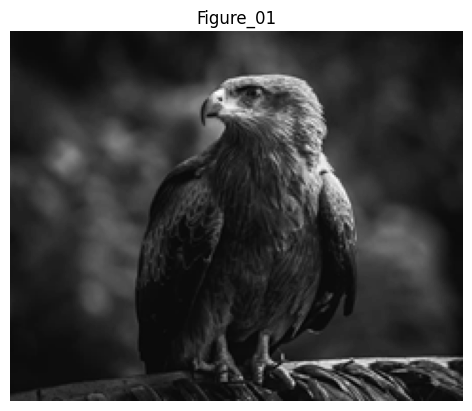

In [5]:
def show_image(fig_01_path, title = "", cmap='gray'):
    plt.imshow(fig_01_path, cmap = cmap)
    plt.title (title)
    plt.axis ('off')
    plt.show
show_image(fig_01,"Figure_01")

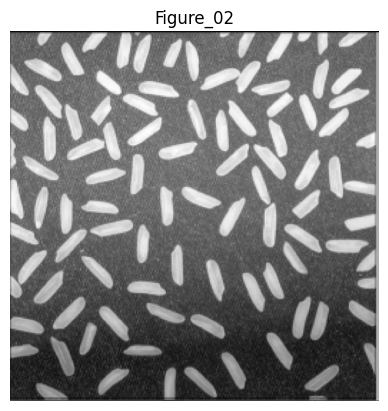

In [6]:
def show_image(fig_02_path, title = "", cmap='gray'):
    plt.imshow(fig_02_path, cmap = cmap)
    plt.title (title)
    plt.axis ('off')
    plt.show
show_image(fig_02,"Figure_02")

# Q1.	Use contrast stretching on the image

In [12]:
import os
output_dir = '/kaggle/working/img'
output_path = os.path.join(output_dir, 'comparison_contrast_stretching.png')
os.makedirs(output_dir, exist_ok=True)


In [14]:
def contrast_stretching(fig_01):
    min_val = np.min(fig_01)
    max_val = np.max(fig_01)
    stretched = ((fig_01 - min_val) / (max_val - min_val)) * 255
    return stretched.astype(np.uint8)

stretched_image = contrast_stretching(fig_01)




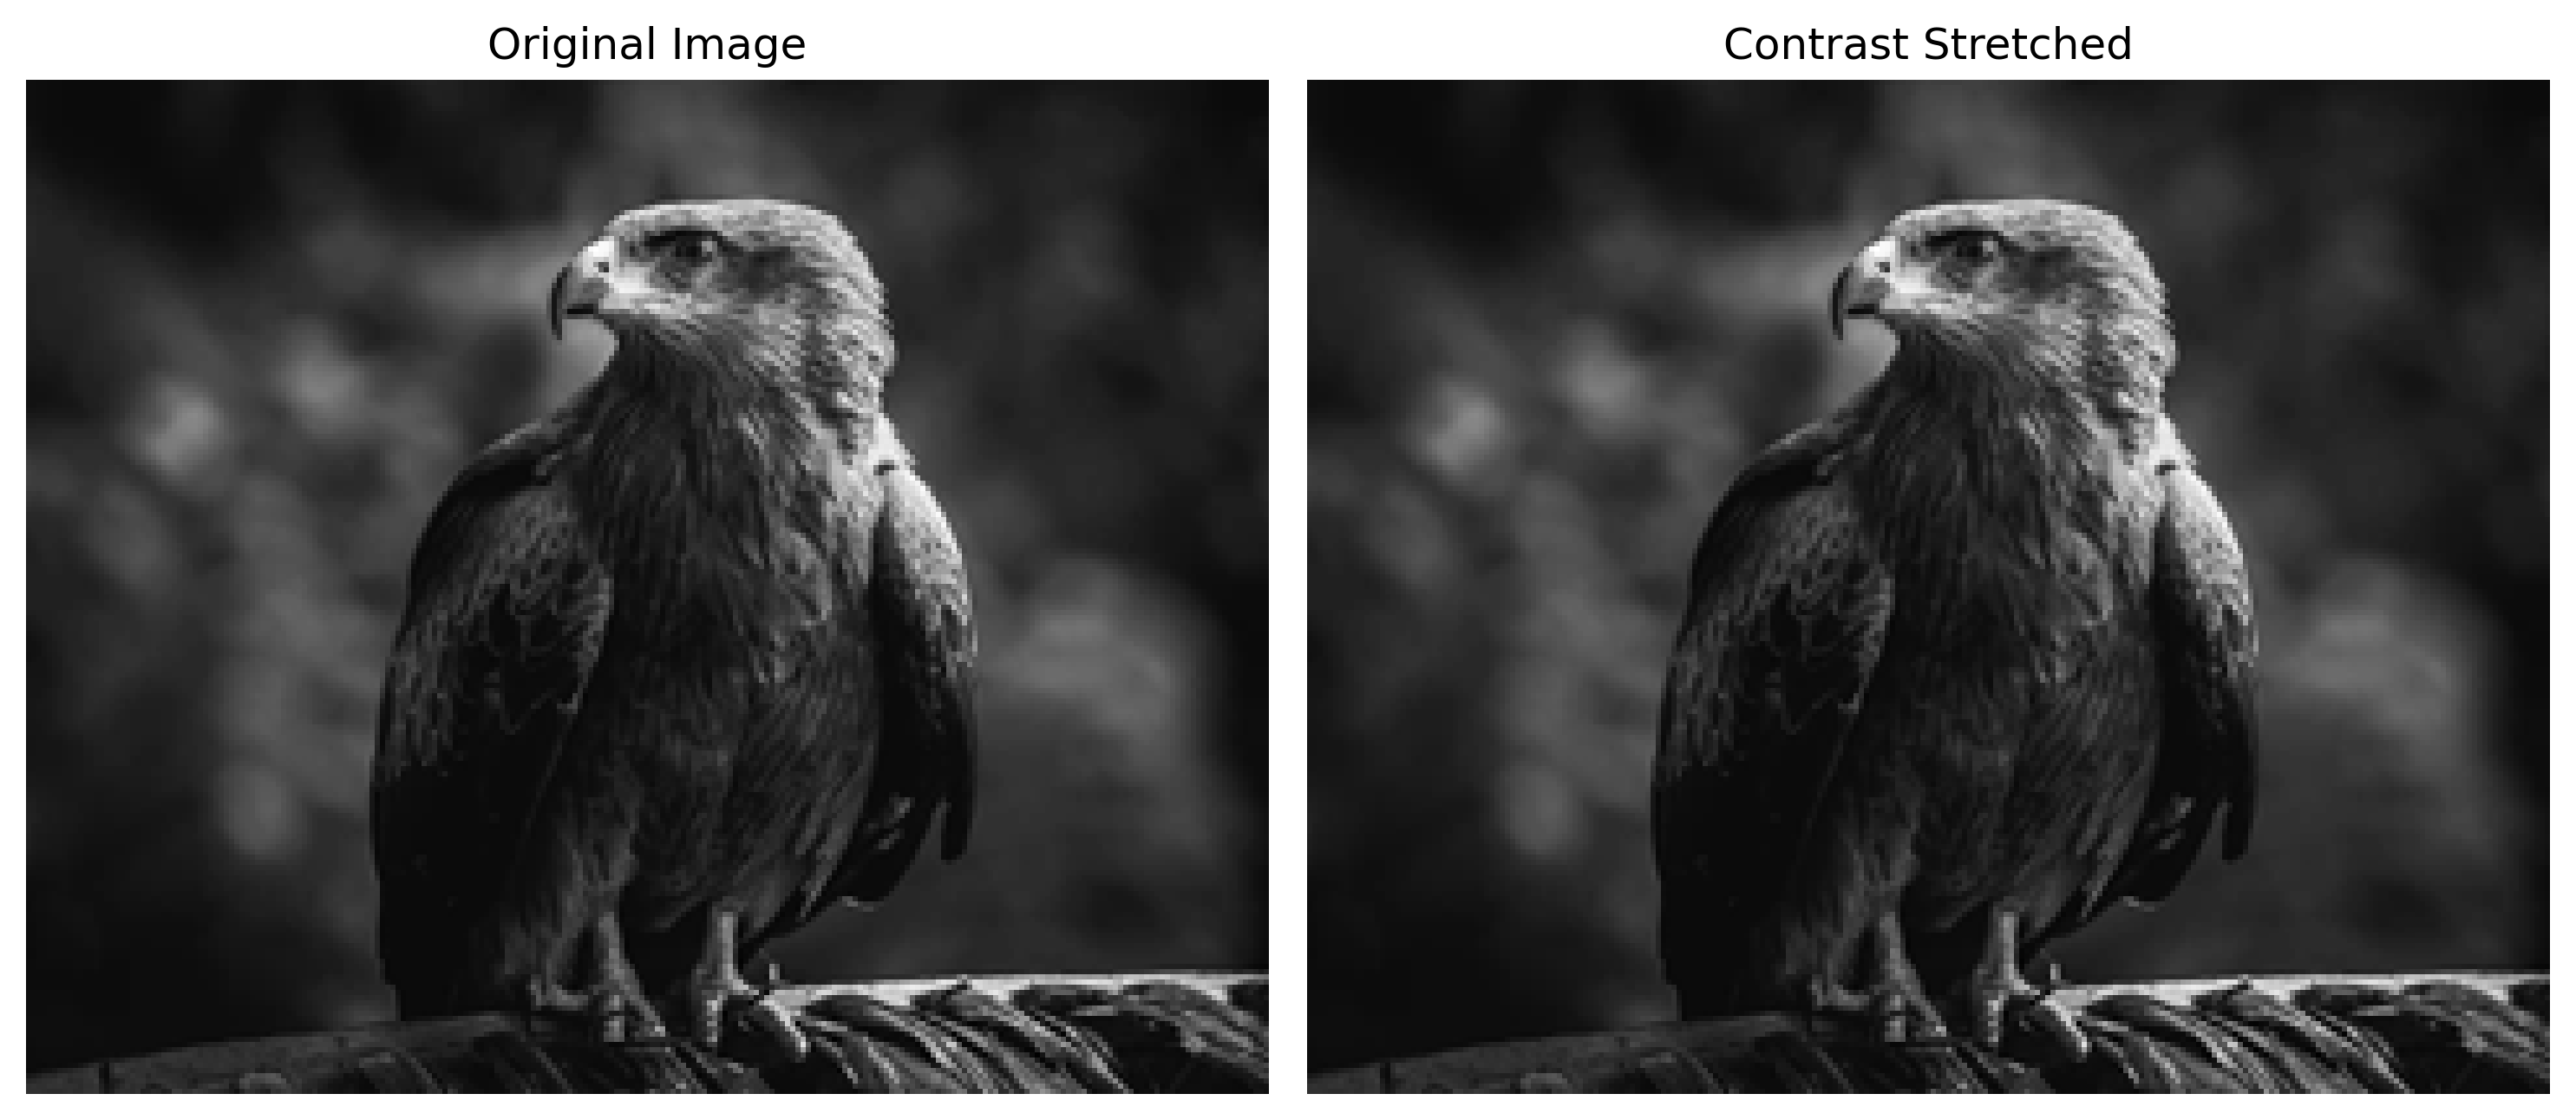

Comparison image saved successfully to: /kaggle/working/img/comparison_contrast_stretching.png


In [16]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=300)

axs[0].imshow(fig_01, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(stretched_image, cmap='gray')
axs[1].set_title('Contrast Stretched')
axs[1].axis('off')

plt.tight_layout()
plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()  
plt.close()

print(f"Comparison image saved successfully to: {output_path}")

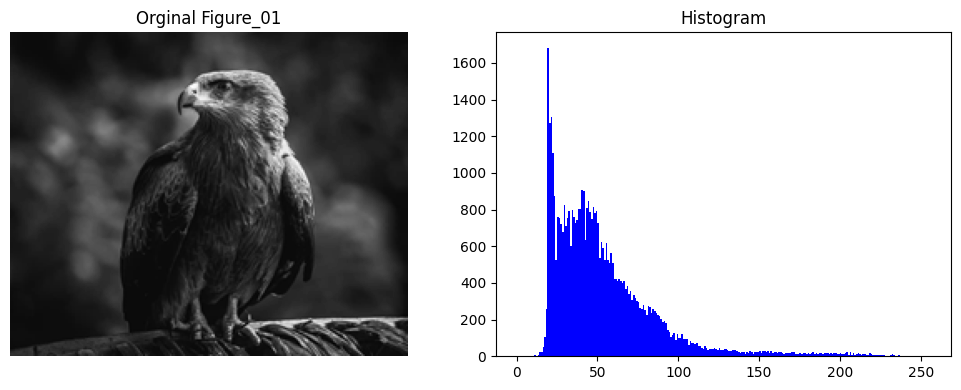

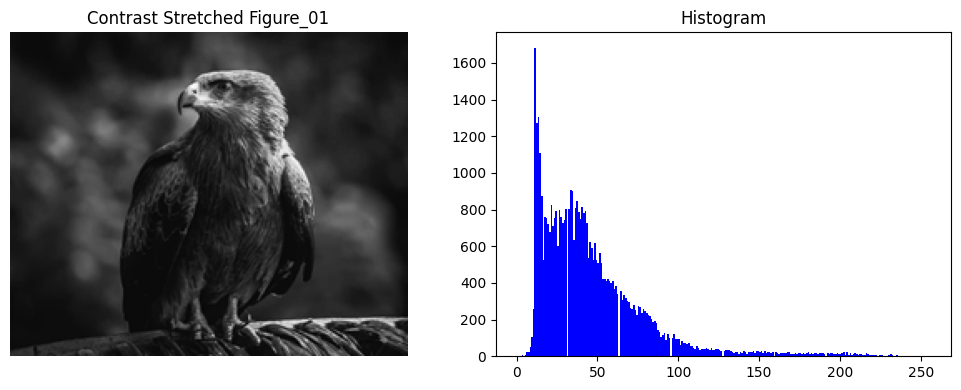

In [36]:
output_dir = '/kaggle/working/img'
output_path = os.path.join(output_dir, 'histogram_contrast_stretching.png')
def show_image_and_hist(img, title):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Display image
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title(title)
    axs[0].axis('off')

    # Display histogram
    axs[1].hist(img.ravel(), bins=256, range=(0, 256), color='blue')
    axs[1].set_title('Histogram')

    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()
stretched_img = contrast_stretching(fig_01)
show_image_and_hist(fig_01,"Orginal Figure_01")
show_image_and_hist(stretched_img,"Contrast Stretched Figure_01")

# Q2.	Apply bit plane slicing on the image.

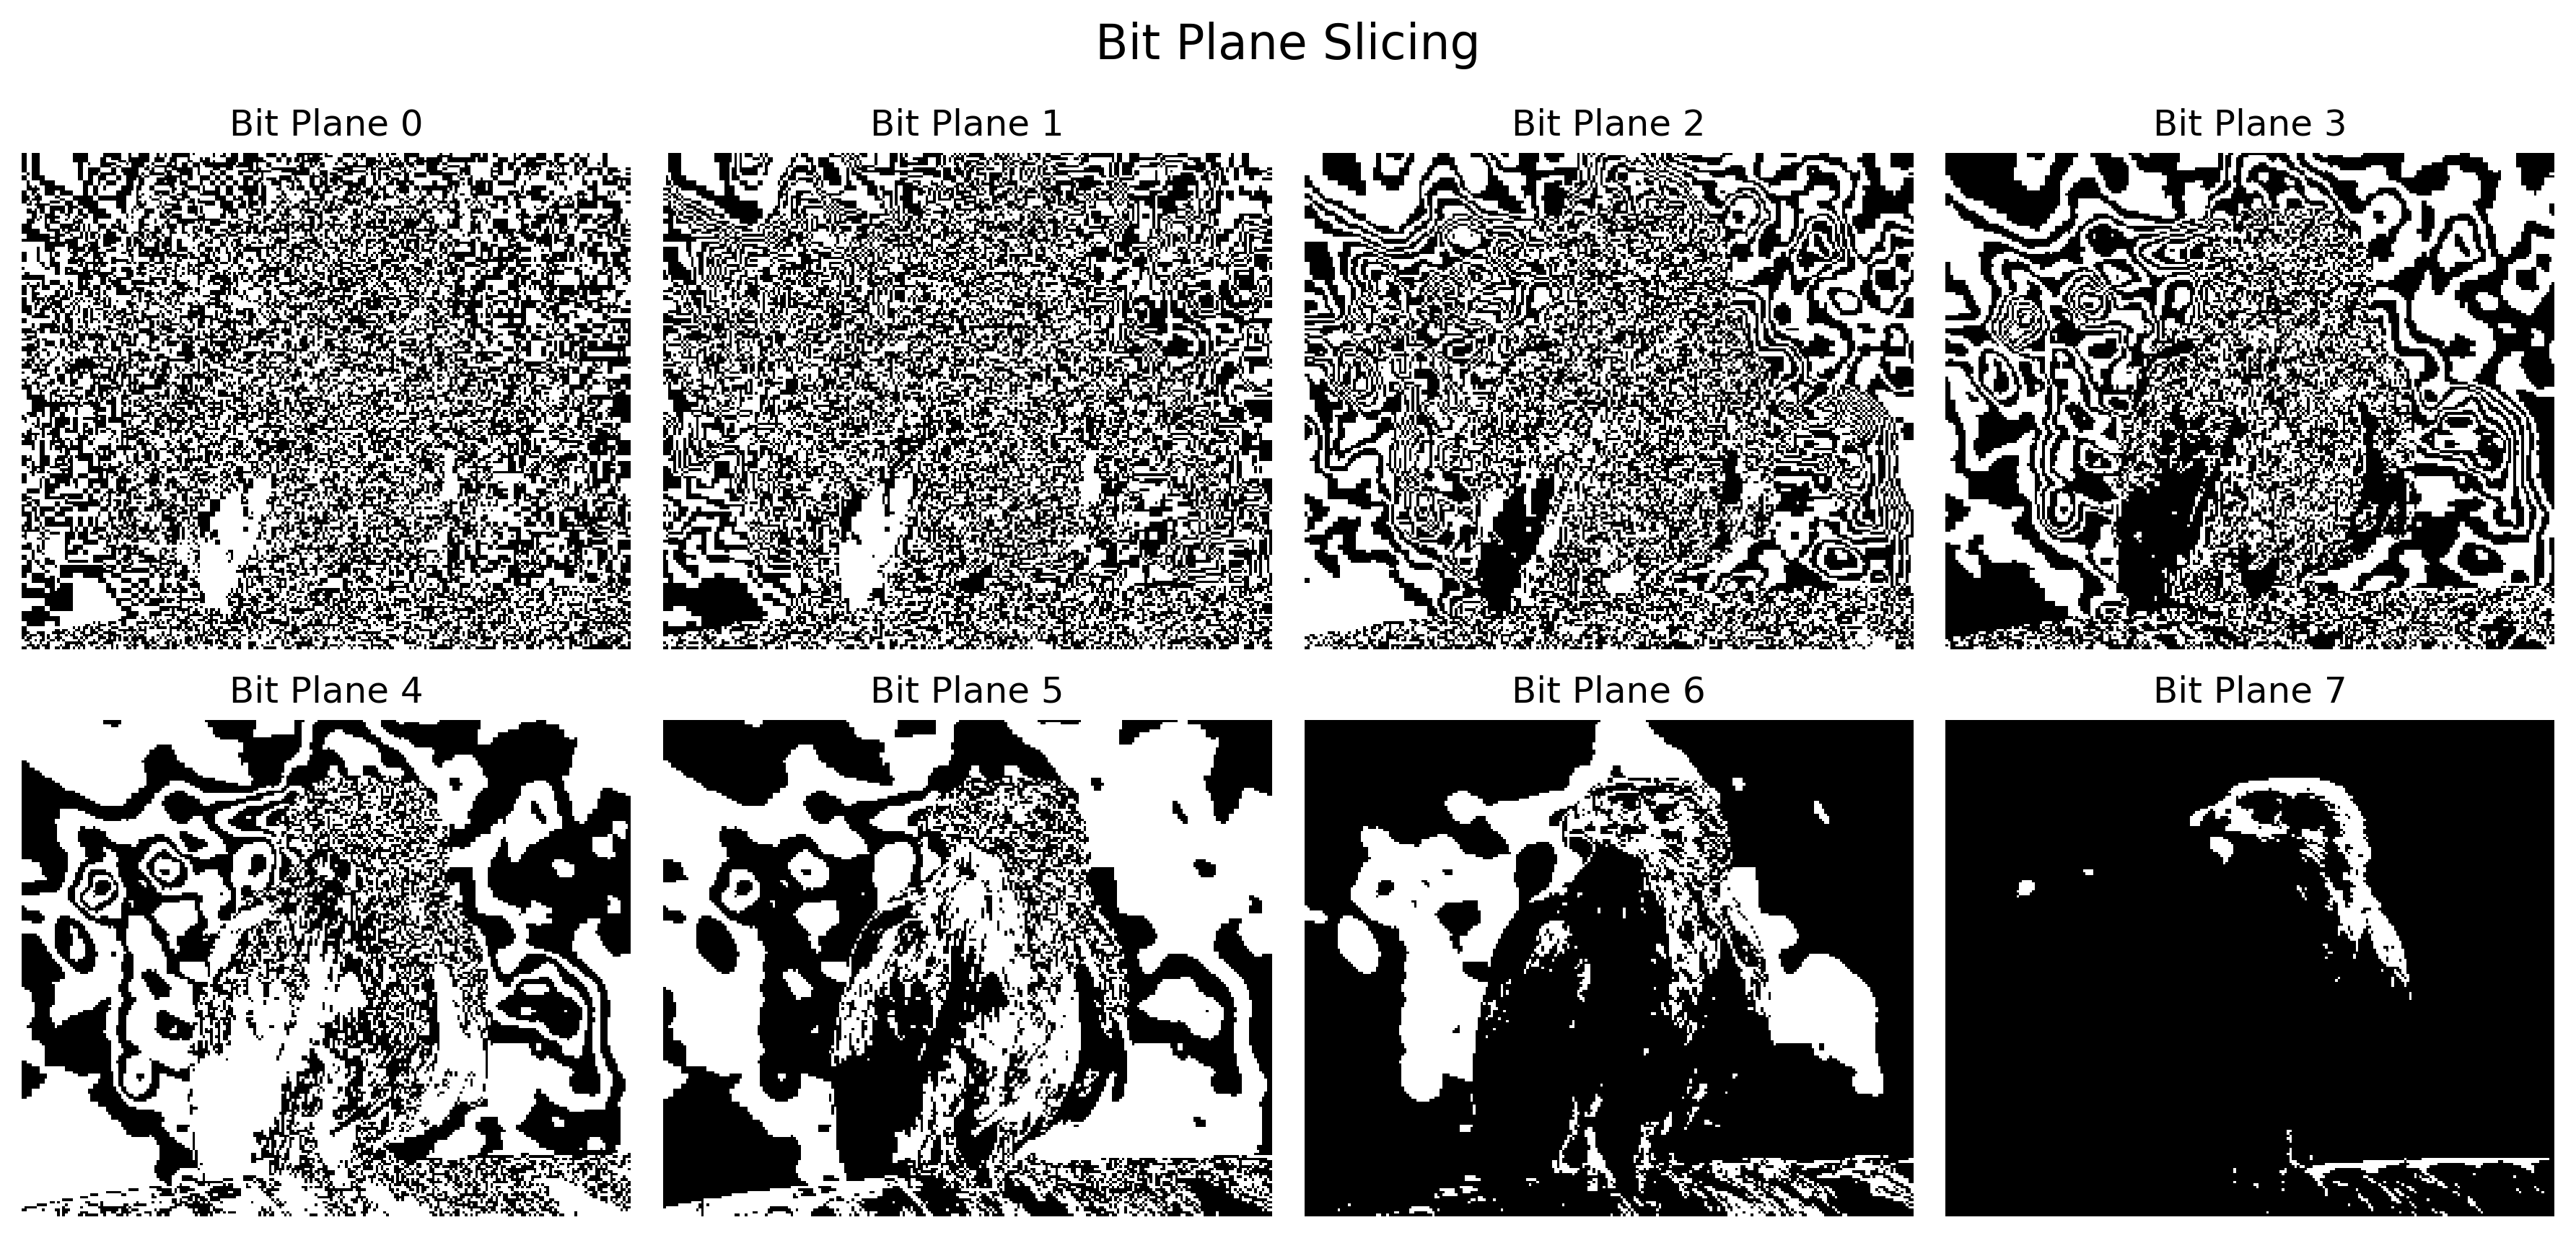

Bit plane slicing image saved to: /kaggle/working/img/bit plane slicing on the image.png


In [27]:
output_dir = '/kaggle/working/img'
output_path = os.path.join(output_dir, 'bit plane slicing on the image.png')
# Extract bit planes
bit_planes = []
for i in range(8):
    
    bit_plane = (fig_01 >> i) & 1
    bit_planes.append(bit_plane * 255)  


fig, axs = plt.subplots(2, 4, figsize=(12, 6), dpi=300)
fig.suptitle('Bit Plane Slicing', fontsize=16)

for i in range(8):
    row = i // 4
    col = i % 4
    axs[row, col].imshow(bit_planes[i], cmap='gray')
    axs[row, col].set_title(f'Bit Plane {i}')
    axs[row, col].axis('off')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show() 
plt.close()

print(f"Bit plane slicing image saved to: {output_path}")

# Q3.	Change the contrast of the image using Logarithmic Transformation and Power-law Transformation.

1. Logarithmic Transformation

In [28]:
def log_transform(img):
    img_float = img.astype(np.float32)
    c = 255 / np.log(1 + np.max(img_float))
    log_image = c * np.log(1 + img_float)
    return np.uint8(np.clip(log_image, 0, 255))





 2. Power-Law (Gamma) Transformation

In [29]:
def gamma_transform(img, gamma=0.5):
    img_normalized = img / 255.0
    gamma_corrected = np.power(img_normalized, gamma)
    return np.uint8(np.clip(gamma_corrected * 255, 0, 255))

Apply transformations

In [31]:
log_img = log_transform(fig_02)
gamma_img = gamma_transform(fig_02, gamma=0.5)

Plot original and transformed images

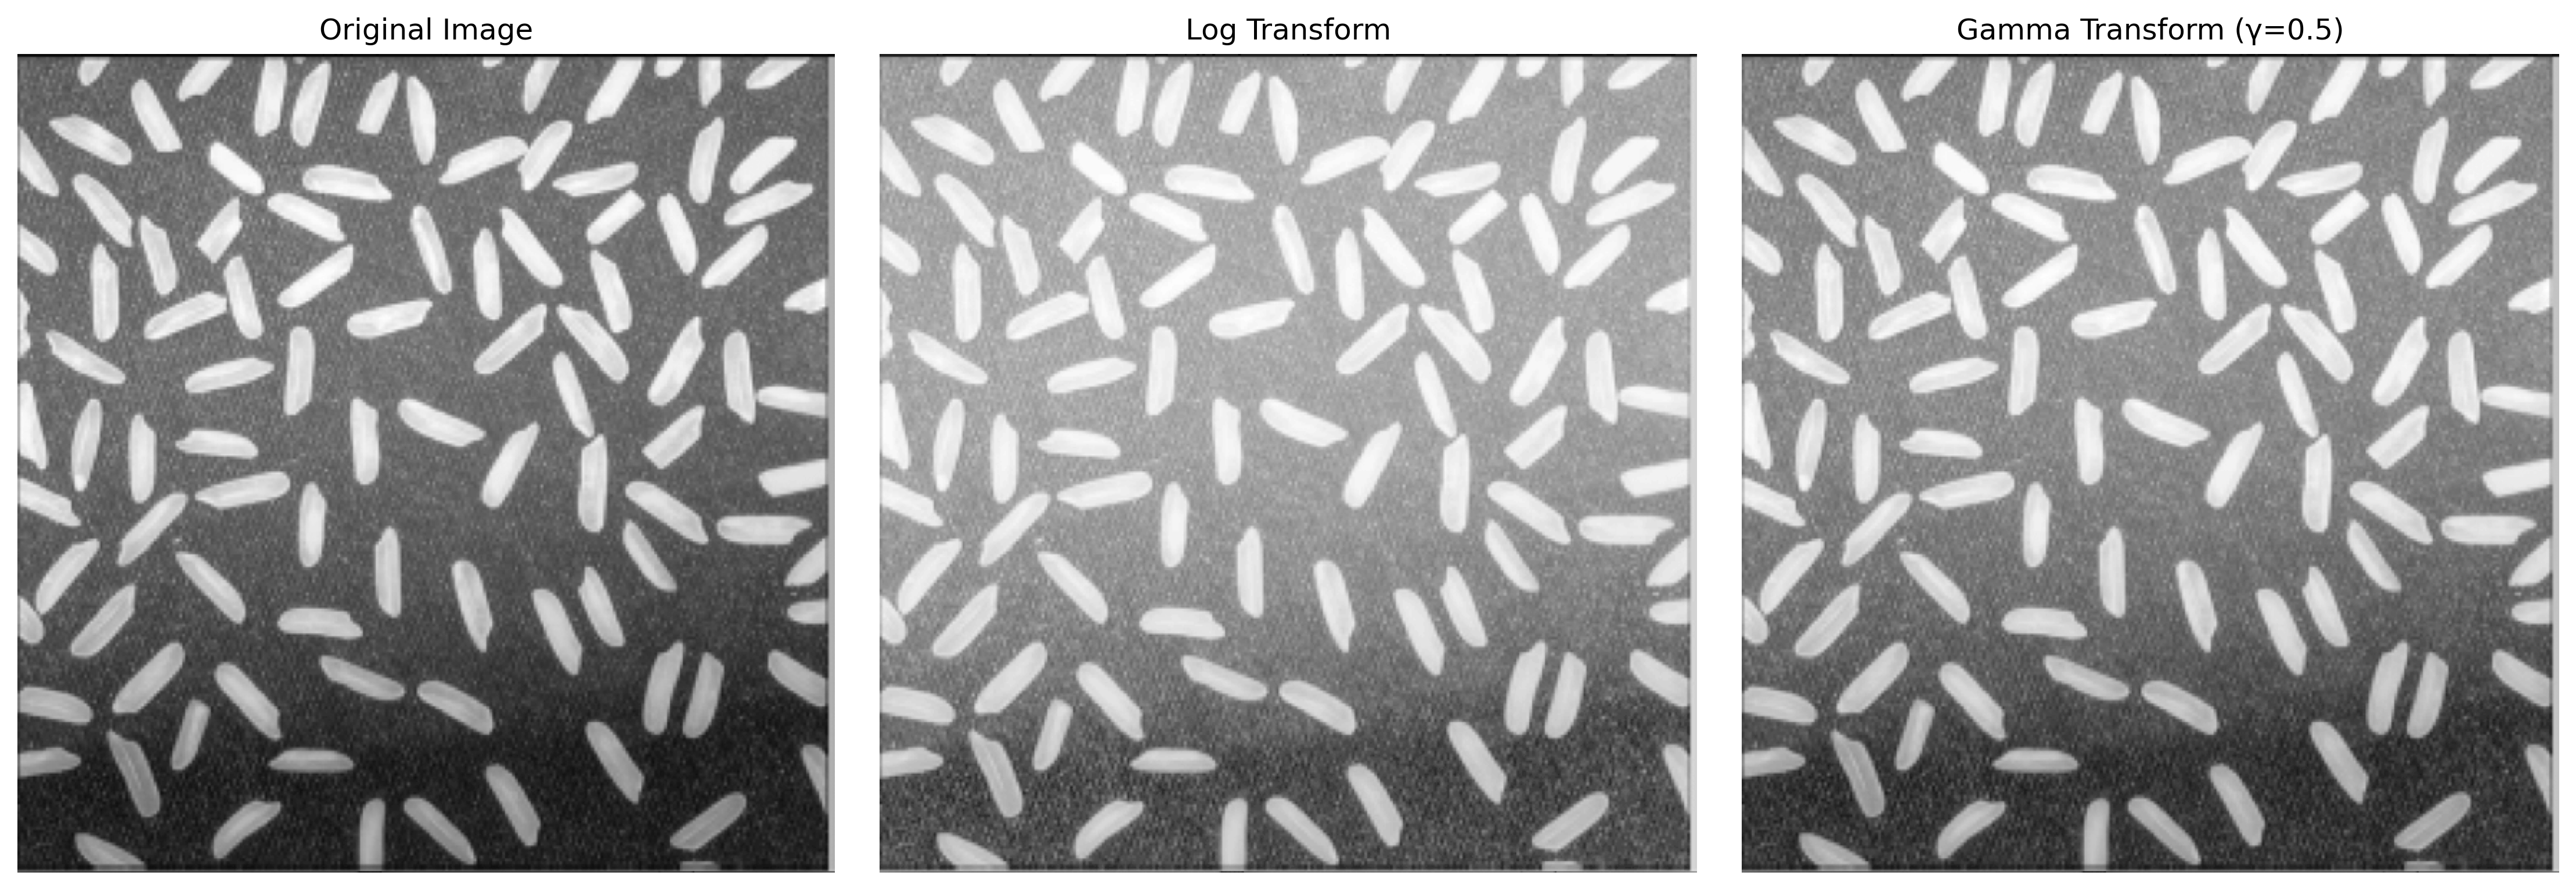

Transformed image saved to: /kaggle/working/img/figure02_log_gamma_transform.png


In [32]:
titles = ['Original Image', 'Log Transform', 'Gamma Transform (γ=0.5)']
images = [fig_02, log_img, gamma_img]

plt.figure(figsize=(15, 5), dpi=300)
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()

output_dir = '/kaggle/working/img'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'figure02_log_gamma_transform.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

print(f"Transformed image saved to: {output_path}")

Histogram comparison Log and Gamma Transform

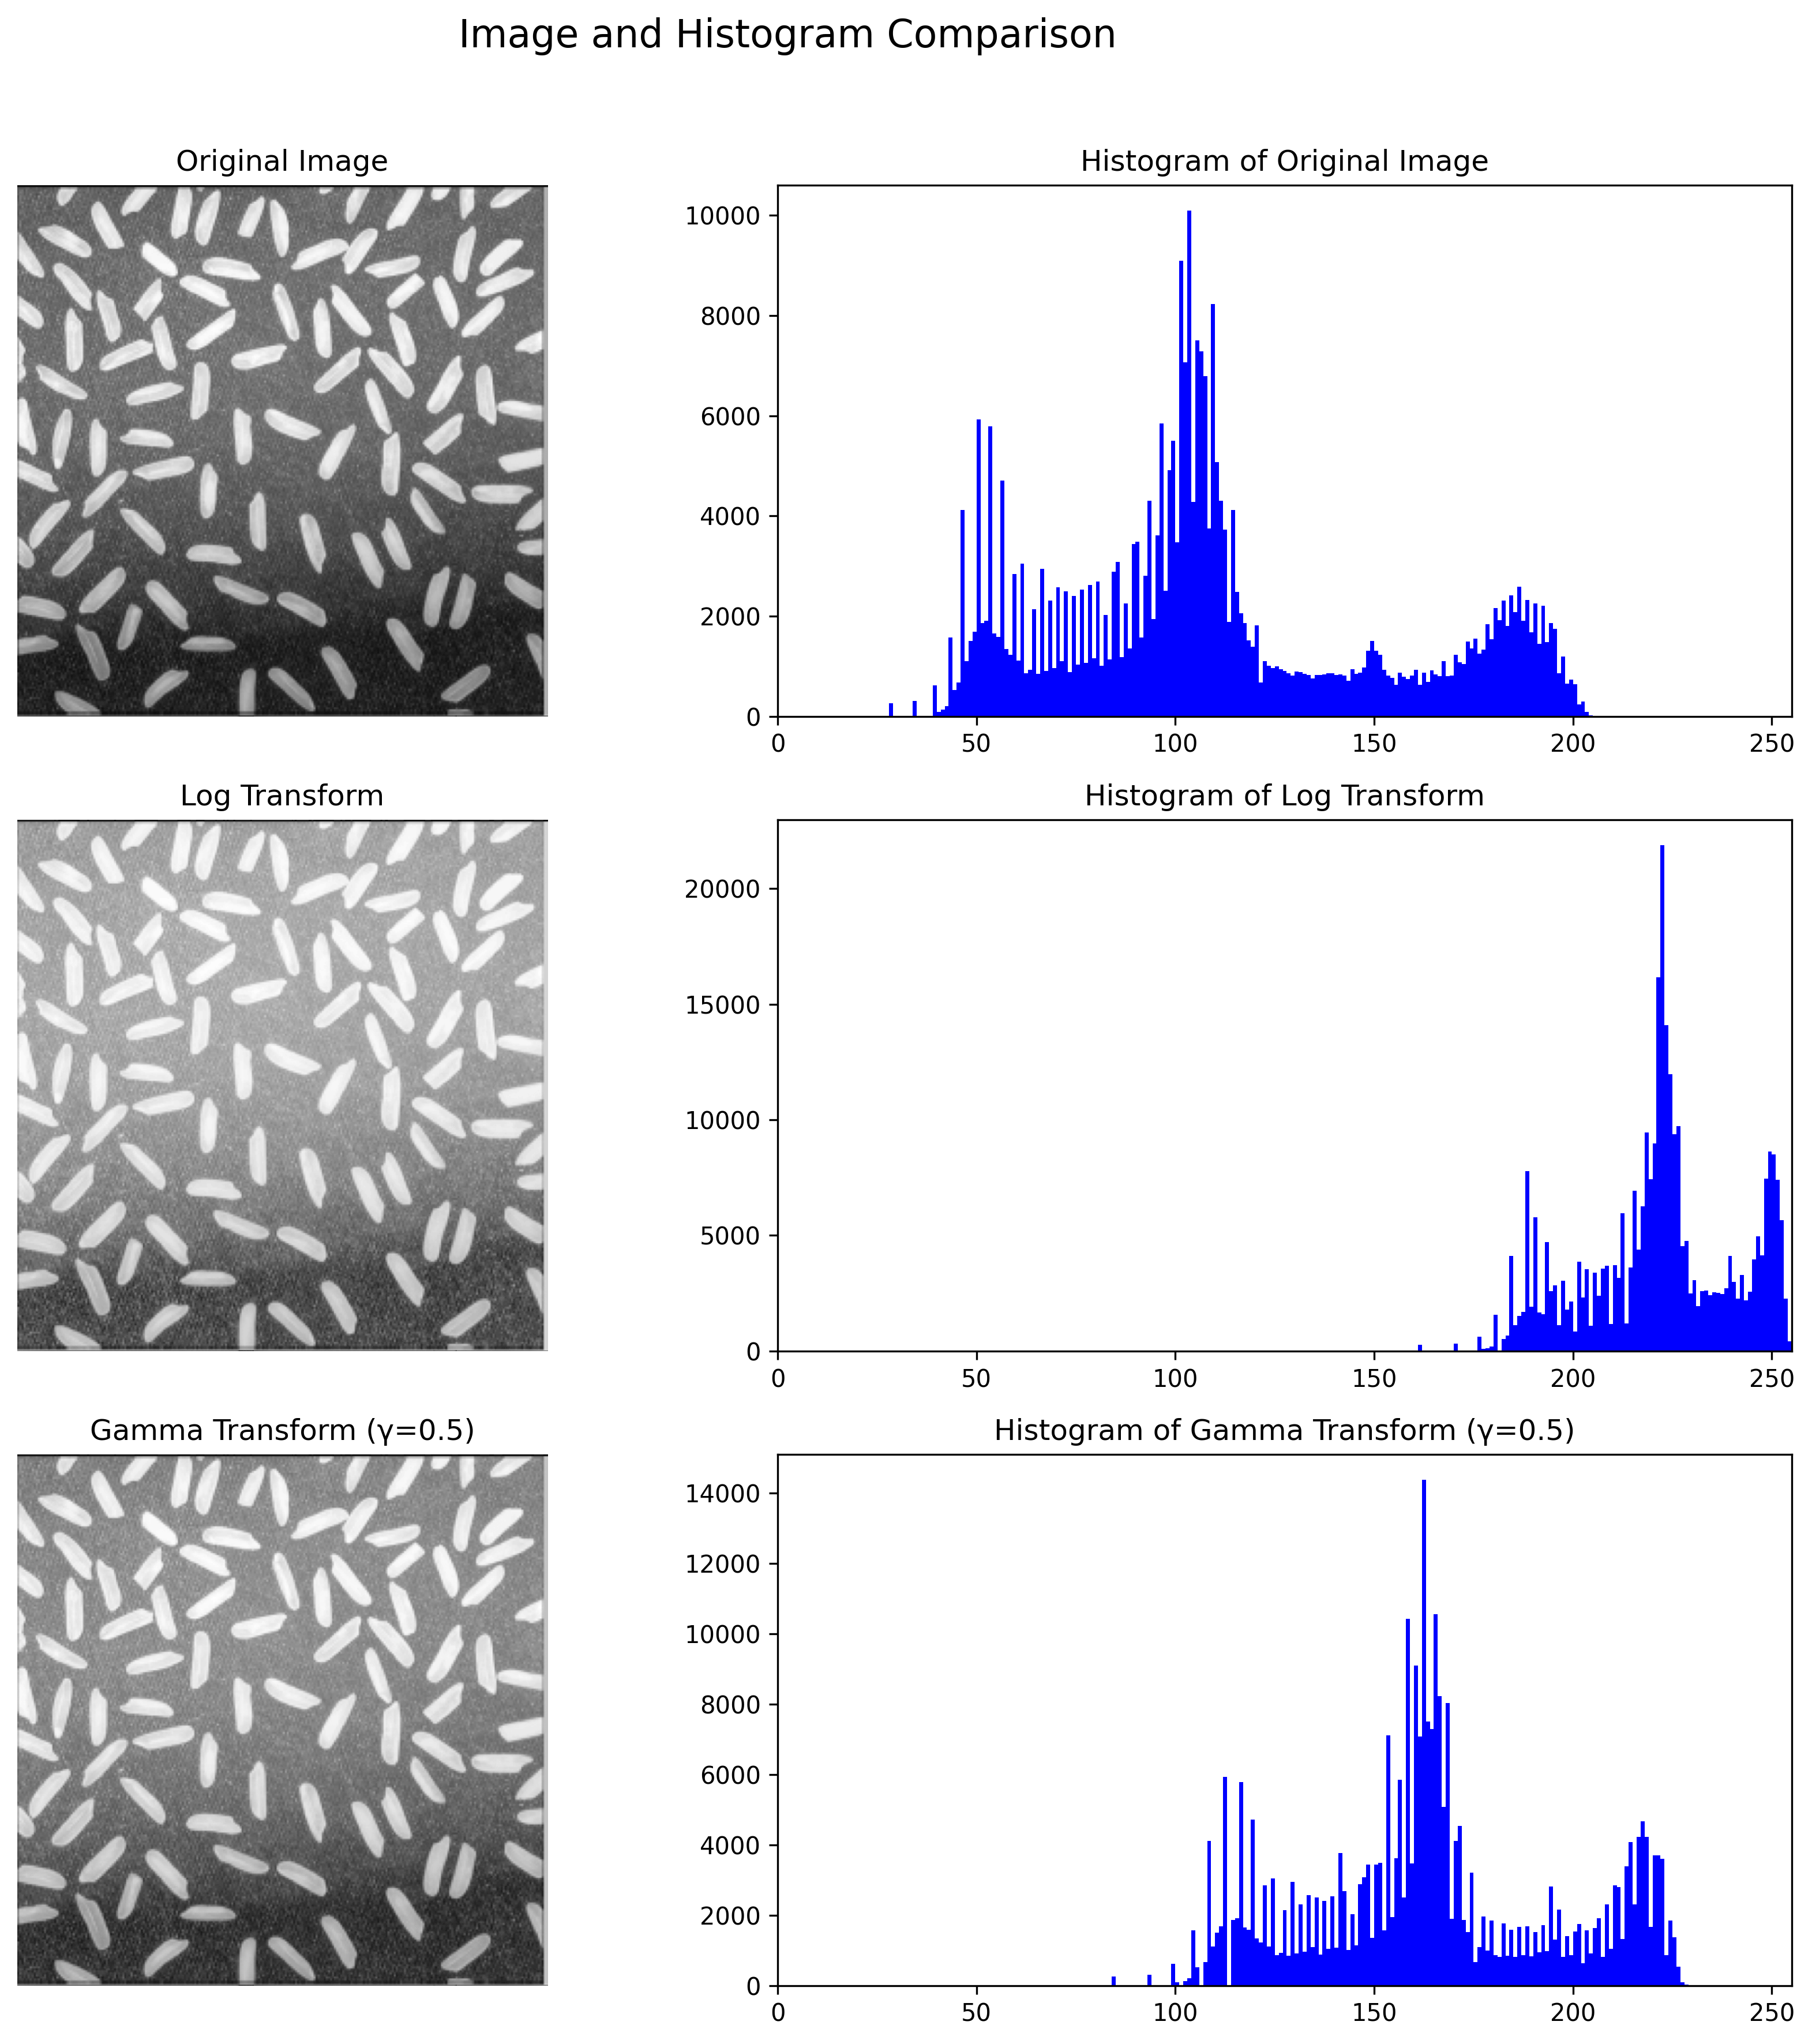

Image and histogram comparison saved to: /kaggle/working/img/figure02_log_gamma_hist_comparison.png


In [38]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12), dpi=300)
fig.suptitle('Image and Histogram Comparison', fontsize=16)

for i in range(3):
    
    axs[i, 0].imshow(images[i], cmap='gray')
    axs[i, 0].set_title(titles[i])
    axs[i, 0].axis('off')
    
   
    axs[i, 1].hist(images[i].ravel(), bins=256, range=(0, 256), color='blue')
    axs[i, 1].set_title(f'Histogram of {titles[i]}')
    axs[i, 1].set_xlim([0, 255])

plt.tight_layout(rect=[0, 0, 1, 0.96])


output_dir = '/kaggle/working/img'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'figure02_log_gamma_hist_comparison.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

print(f"Image and histogram comparison saved to: {output_path}")